In [8]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
betas = np.linspace(0, 10, 21)

In [13]:
nodes_bnt = np.load('nodes_bnt.npy')
lb, runs, tmax, lx, ly, K = nodes_bnt.shape
lgca = get_lgca(nodes=nodes_bnt[0, 0, 0])
lgca.set_r_int(2)

record = np.moveaxis(nodes_bnt, 0, -2)
record = np.moveaxis(record, 0, -2)
record = np.moveaxis(record, 0, -2)
dens = record.sum(-1)
vorts = np.empty(len(betas))
corrs = np.empty(len(betas))
speeds = corrs.copy()
single_cell = np.zeros_like(dens)

nbs = lgca.nb_sum(dens)
single_cell[(nbs == 0) & (dens == 1)] = 1
single_cell = np.sum(single_cell, axis=(0, 1, -1))
single_cell = single_cell.mean(1)



flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)

vort = abs(lgca.calc_vorticity(record))

#mean_v = np.mean(speed[dens>0])
#v = flux
nb_v = lgca.nb_sum(v)
nb_v_norm = np.linalg.norm(nb_v, axis=-1)

corr = np.einsum('...i, ...i', v, nb_v)
corr = np.divide(corr, speed, where=speed>0, out=np.zeros_like(corr))
corr = np.divide(corr, nb_v_norm, where=nb_v_norm>0, out=np.zeros_like(corr))

#corr = np.mean(corr[dens>0])


for i in range(len(betas)):
    ind = np.s_[2:-2, 6:, i]
    vorti = vort[ind]
    densi = dens[ind]
    corri = corr[ind]
    densi = dens[ind]
    speedi = speed[ind]
    speeds[i] = np.mean(speedi[densi>0])
    vorts[i] = np.mean(vorti[densi>0])
    corrs[i] = np.mean(corri[speedi>0])
    

mean_speed = np.sum(record[..., :lgca.velocitychannels], axis=(0, 1, 3, 4, 5)) / np.sum(record, axis=(0, 1, 3, 4, 5))

Random walk interaction is used.


<IPython.core.display.Javascript object>


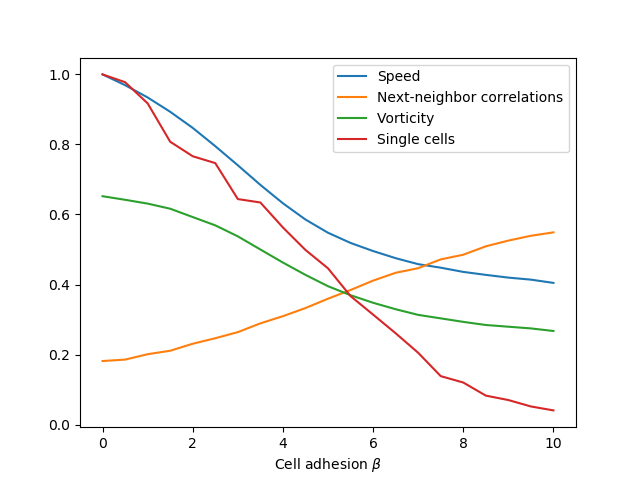

In [18]:
plt.plot(betas, mean_speed / mean_speed.max(), label='Speed')
#plt.plot(betas, speeds * 2, label='Speed (Def. 2)')
plt.plot(betas, corrs, label='Next-neighbor correlations')
plt.plot(betas, vorts, label='Vorticity')
plt.plot(betas, single_cell/single_cell.max(), label='Single cells')
plt.xlabel('Cell adhesion $\\beta$')
plt.legend()
#plt.savefig('wound_healing_analysis.png')

In [21]:
lgca = get_lgca(nodes=nodes_bnt[-1, 0, 0])
lgca.nodes_t = nodes_bnt[0, 0]

Random walk interaction is used.


<IPython.core.display.Javascript object>


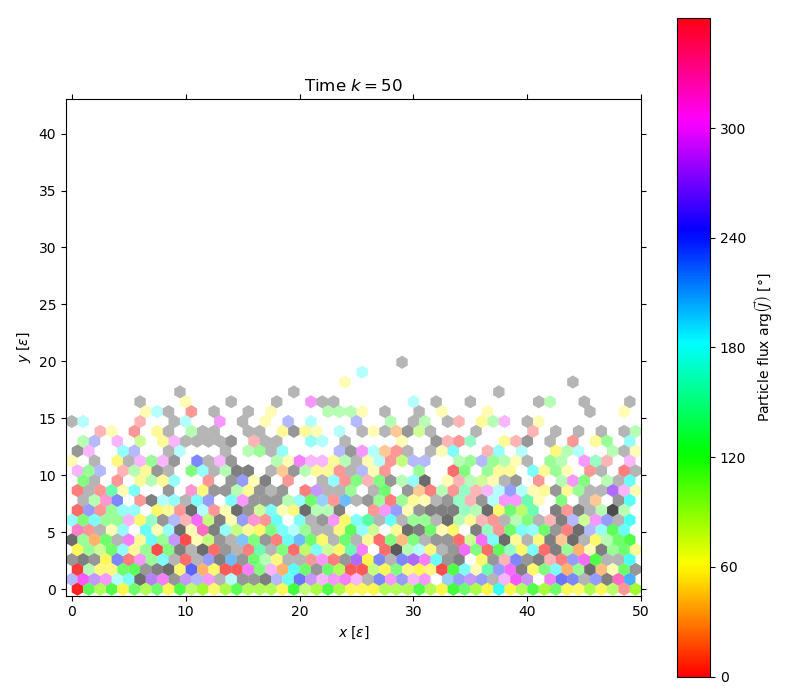

In [22]:
lgca.animate_flux()